In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
file1 = pd.read_csv('complete_data_unscaled.csv')
file2 = pd.read_csv('complete_data.csv')

In [3]:
print(file1.head(5))

         town flat_type      flat_model  month_count  floor_area_sqm  storey  \
0     hougang    4_room  new_generation            0            93.0       8   
1  queenstown    3_room        standard            0            66.0       5   
2  queenstown    3_room        standard            0            52.0       5   
3  queenstown    3_room        standard            0            56.0       2   
4  queenstown    4_room        improved            0            82.0      14   

   remaining_lease  dist_phpcs  dist_schools  dist_supermarkets  \
0               85       0.336         0.506              0.582   
1               71       0.297         0.340              0.528   
2               73       0.154         0.074              0.338   
3               73       0.170         0.214              0.402   
4               77       0.108         0.759              0.105   

   dist_hawkercentres  dist_mrtlrt  dist_city  int_rate  resale_price  
0               0.847        4.489     10.02

In [4]:
print(file2.head(5))

         town flat_type      flat_model  month_count  floor_area_sqm  storey  \
0     hougang    4_room  new_generation          0.0        0.241636  0.1250   
1  queenstown    3_room        standard          0.0        0.141264  0.0625   
2  queenstown    3_room        standard          0.0        0.089219  0.0625   
3  queenstown    3_room        standard          0.0        0.104089  0.0000   
4  queenstown    4_room        improved          0.0        0.200743  0.2500   

   remaining_lease  dist_phpcs  dist_schools  dist_supermarkets  \
0         0.724138    0.122762      0.091766           0.175354   
1         0.482759    0.108513      0.061661           0.159084   
2         0.517241    0.056266      0.013420           0.101838   
3         0.517241    0.062112      0.038810           0.121121   
4         0.586207    0.039459      0.137650           0.031636   

   dist_hawkercentres  dist_mrtlrt  dist_city  int_rate  resale_price  
0            0.127374     0.606052   0.41599

In [5]:
print(file1['town'].unique())
print(len(file1['town'].unique()))

['hougang' 'queenstown' 'serangoon' 'sembawang' 'sengkang' 'pasir_ris'
 'tampines' 'kallang/whampoa' 'marine_parade' 'jurong_west' 'woodlands'
 'yishun' 'toa_payoh' 'bukit_batok' 'bishan' 'bedok' 'bukit_merah'
 'bukit_panjang' 'ang_mo_kio' 'jurong_east' 'geylang' 'choa_chu_kang'
 'central_area' 'bukit_timah' 'clementi' 'punggol']
26


In [6]:
print(file1['flat_type'].unique())
print(len(file1['flat_type'].unique()))

['4_room' '3_room' '5_room' 'executive' '2_room' '1_room'
 'multi_generation']
7


In [7]:
print(file1['flat_model'].unique())
print(len(file1['flat_model'].unique()))

['new_generation' 'standard' 'improved' 'model_a' 'maisonette'
 'simplified' 'apartment' 'terrace' 'model_a-maisonette'
 'improved-maisonette' 'multi_generation' '2-room' 'adjoined_flat'
 'premium_apartment' 'premium_maisonette' 'model_a2' 'dbss' 'type_s1'
 'type_s2' 'premium_apartment_loft' '3gen']
21


In [8]:
data1  = pd.concat([file1.iloc[:, 3:-1], pd.get_dummies(file1.iloc[:, 0:3], drop_first = True), file1.iloc[:, -1]], axis = 1)
data2  = pd.concat([file2.iloc[:, 3:-1], pd.get_dummies(file2.iloc[:, 0:3], drop_first = True), file2.iloc[:, -1]], axis = 1)

In [9]:
data1.head(10)

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,resale_price
0,0,93.0,8,85,0.336,0.506,0.582,0.847,4.489,10.024,...,1,0,0,0,0,0,0,0,0,227000.0
1,0,66.0,5,71,0.297,0.340,0.528,0.272,0.579,6.096,...,0,0,0,0,0,1,0,0,0,131000.0
2,0,52.0,5,73,0.154,0.074,0.338,0.182,0.376,6.023,...,0,0,0,0,0,1,0,0,0,122000.0
3,0,56.0,2,73,0.170,0.214,0.402,0.159,0.450,6.091,...,0,0,0,0,0,1,0,0,0,128000.0
4,0,82.0,14,77,0.108,0.759,0.105,0.207,0.295,7.540,...,0,0,0,0,0,0,0,0,0,290000.0
5,0,89.0,2,73,0.343,0.638,0.491,0.333,0.675,5.824,...,0,0,0,0,0,0,0,0,0,233000.0
6,0,86.0,11,74,0.748,0.504,0.353,0.908,1.305,8.545,...,0,0,0,0,0,0,0,0,0,275000.0
7,0,88.0,14,74,0.170,1.212,0.282,0.242,0.792,7.113,...,0,0,0,0,0,0,0,0,0,296000.0
8,0,88.0,8,75,0.173,1.176,0.162,0.177,0.470,6.957,...,0,0,0,0,0,0,0,0,0,318000.0
9,0,88.0,5,75,0.181,1.113,0.068,0.134,0.399,7.050,...,0,0,0,0,0,0,0,0,0,305000.0


In [10]:
data2.head(10)

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,resale_price
0,0.0,0.241636,0.1250,0.724138,0.122762,0.091766,0.175354,0.127374,0.606052,0.415998,...,1,0,0,0,0,0,0,0,0,227000.0
1,0.0,0.141264,0.0625,0.482759,0.108513,0.061661,0.159084,0.040699,0.075451,0.242882,...,0,0,0,0,0,1,0,0,0,131000.0
2,0.0,0.089219,0.0625,0.517241,0.056266,0.013420,0.101838,0.027133,0.047903,0.239665,...,0,0,0,0,0,1,0,0,0,122000.0
3,0.0,0.104089,0.0000,0.517241,0.062112,0.038810,0.121121,0.023666,0.057945,0.242662,...,0,0,0,0,0,1,0,0,0,128000.0
4,0.0,0.200743,0.2500,0.586207,0.039459,0.137650,0.031636,0.030901,0.036911,0.306523,...,0,0,0,0,0,0,0,0,0,290000.0
5,0.0,0.226766,0.0000,0.517241,0.125320,0.115705,0.147936,0.049894,0.088479,0.230895,...,0,0,0,0,0,0,0,0,0,233000.0
6,0.0,0.215613,0.1875,0.534483,0.273292,0.091404,0.106357,0.136569,0.173972,0.350815,...,0,0,0,0,0,0,0,0,0,275000.0
7,0.0,0.223048,0.2500,0.534483,0.062112,0.219804,0.084965,0.036177,0.104356,0.287704,...,0,0,0,0,0,0,0,0,0,296000.0
8,0.0,0.223048,0.1250,0.551724,0.063208,0.213275,0.048810,0.026379,0.060660,0.280829,...,0,0,0,0,0,0,0,0,0,318000.0
9,0.0,0.223048,0.0625,0.551724,0.066131,0.201850,0.020488,0.019897,0.051025,0.284927,...,0,0,0,0,0,0,0,0,0,305000.0


In [11]:
len(data2)

616778

**Using Scaled Dataset, data input format preparation Method 1**

In [12]:
timestep = 10
X2_mtd1 = [data2.iloc[i:i+timestep, 0:-1].to_numpy() for i in range(len(data2)-timestep+1)]
X2_mtd1 = np.stack(X2_mtd1, axis=0)
y2_mtd1 = np.array([data2.iloc[i+timestep-1, -1] for i in range(len(data2)-timestep+1)])

In [13]:
print(X2_mtd1.shape)
y2_mtd1 = y2_mtd1.reshape(-1,1)
print(y2_mtd1.shape)

(616769, 10, 62)
(616769, 1)


**Using Scaled Dataset, data input format preparation Method 2**

In [14]:
## Method 2 is significantly slower due to nested for loop

#timestep = 10
#mtd2 = [np.array([data2.iloc[j:j+timestep, i] for j in range(len(data2)-timestep+1)]) for i in range(len(data2.columns))]
#X2_mtd2 = np.stack(mtd2[0:-1], axis=2)
#y2_mtd2 = mtd2[-1][:, -1]


In [15]:
## Method 2 is significantly slower due to nested for loop

#print(X2_mtd2.shape)
#y2_mtd2 = y2_mtd2.reshape(-1,1)
#print(y2_mtd2.shape)

In [16]:
#print(False in (X2_mtd1 == X2_mtd2)) # To check if the output from Method 1 and Method 2 are the same

In [17]:
#print(False in (y2_mtd1 == y2_mtd2)) # To check if the output from Method 1 and Method 2 are the same

**Scaled Dataset**

In [18]:
cutoff = len(data1[data1['month_count'] < 221]) # Using data1 here only for easy extraction of cutoff threshold
X_train2 = X2_mtd1[0:cutoff, :]
y_train2 = y2_mtd1[0:cutoff, :]
X_test2 = X2_mtd1[cutoff:, :]
y_test2 = y2_mtd1[cutoff:, :]

In [19]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(491724, 10, 62)
(491724, 1)
(125045, 10, 62)
(125045, 1)


In [20]:
LSTMmodel = tf.keras.models.Sequential()
LSTMmodel.add(tf.keras.Input(shape = (10,62)))
LSTMmodel.add(tf.keras.layers.LSTM(32, return_sequences=False))
LSTMmodel.add(tf.keras.layers.Dense(8, activation='relu'))
LSTMmodel.add(tf.keras.layers.Dense(1, activation=None))
LSTMmodel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                12160     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,433
Trainable params: 12,433
Non-trainable params: 0
_________________________________________________________________


In [21]:
LSTMmodel.fit(X_train2, y_train2, batch_size = 64, epochs = 100, verbose = True)

Epoch 1/100
7684/7684 [==============================] - 23s 3ms/step - loss: 43804647424.0000 - mean_squared_error: 43804647424.0000
Epoch 2/100
7684/7684 [==============================] - 19s 2ms/step - loss: 1460115328.0000 - mean_squared_error: 1460115328.0000
Epoch 3/100
7684/7684 [==============================] - 19s 2ms/step - loss: 746606272.0000 - mean_squared_error: 746606272.0000
Epoch 4/100
7684/7684 [==============================] - 19s 2ms/step - loss: 650086848.0000 - mean_squared_error: 650086848.0000
Epoch 5/100
7684/7684 [==============================] - 19s 2ms/step - loss: 600411200.0000 - mean_squared_error: 600411200.0000
Epoch 6/100
7684/7684 [==============================] - 19s 3ms/step - loss: 575302720.0000 - mean_squared_error: 575302720.0000
Epoch 7/100
7684/7684 [==============================] - 19s 2ms/step - loss: 555823424.0000 - mean_squared_error: 555823424.0000
Epoch 8/100
7684/7684 [==============================] - 19s 3ms/step - loss: 539981

In [22]:
print('R^2 score for training dataset:', metrics.r2_score(y_train2, LSTMmodel.predict(X_train2)))

15367/15367 [==============================] - 20s 1ms/step
R^2 score for training dataset: 0.9779696954276702


In [23]:
print('R^2 score for testing dataset:', metrics.r2_score(y_test2, LSTMmodel.predict(X_test2)))

3908/3908 [==============================] - 7s 1ms/step
R^2 score for training dataset: 0.7811770650542834


In [26]:
print(data1['month_count'].unique()) # Using data1 as unscaled integer is easier to work with

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [80]:
R2_scaled, RMSE_scaled, data_range = [], [], [len(data1[data1['month_count'] == i]) for i in range(221, 281)]
acc_month = 0
for i in data_range:
    R2_scaled += [ metrics.r2_score(y_test2[acc_month:acc_month+i, :], LSTMmodel.predict(X_test2[acc_month:acc_month+i, :], verbose = False)) ]
    RMSE_scaled += [ metrics.mean_squared_error(y_test2[acc_month:acc_month+i, :], LSTMmodel.predict(X_test2[acc_month:acc_month+i, :], verbose = False)) **0.5 ]
    acc_month += i
print('R^2 score for whole testing dataset:', R2_scaled[-1])
print('R^2 score for first month in testing dataset:', R2_scaled[0])

R^2 score for whole testing dataset: 0.03756536231846186
R^2 score for first month in testing dataset: 0.9536264172289031


In [81]:
print('Number of months where R^2 is higher than 0.9:', len([i for i in R2_scaled if i > 0.9]))

Number of months where R^2 is higher than 0.9: 31


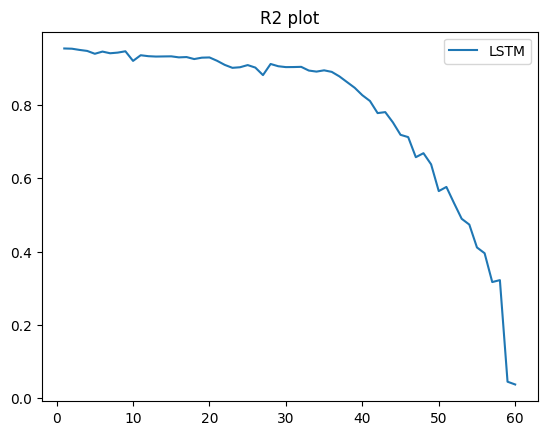

In [82]:
plt.plot(range(1, len(R2_scaled)+1), R2_scaled, label='LSTM')
plt.title('R2 plot')
plt.legend()
plt.show()

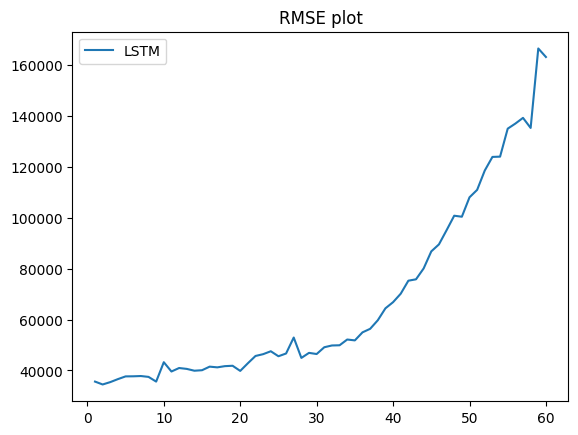

In [83]:
plt.plot(range(1, len(RMSE_scaled)+1), RMSE_scaled, label='LSTM')
plt.title('RMSE plot')
plt.legend()
plt.show()

**LSTM On Isolating Top 3 Impactful Features**

In [47]:
maxfeatcombo = [0, '']

for i in file2['town'].unique():
    for j in file2['flat_type'].unique():
        for k in file2['flat_model'].unique():
            if len(file2[(file2['town'] == i) & (file2['flat_type'] == j) & (file2['flat_model'] == k)]) > maxfeatcombo[0]:
                maxfeatcombo = [len(file2[(file2['town'] == i) & (file2['flat_type'] == j) & (file2['flat_model'] == k)]), i+'...'+j+'...'+k]
            elif len(file2[(file2['town'] == i) & (file2['flat_type'] == j) & (file2['flat_model'] == k)]) == maxfeatcombo[0]:
                maxfeatcombo += [len(file2[(file2['town'] == i) & (file2['flat_type'] == j) & (file2['flat_model'] == k)]), i+'...'+j+'...'+k]
            else:
                pass

print(len(maxfeatcombo))
print(maxfeatcombo)

2
[18583, 'ang_mo_kio...3_room...new_generation']


In [87]:
data3 = file2[(file2['town'] == 'ang_mo_kio') & (file2['flat_type'] == '3_room') & (file2['flat_model'] == 'new_generation')]
data3.head(10)

,town,flat_type,flat_model,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,int_rate,resale_price
2365,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.1250,0.655172,0.048593,0.050417,0.128955,0.059843,0.126747,0.354253,0.543208,163000.0
2366,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.0000,0.655172,0.023749,0.066739,0.044893,0.020500,0.117791,0.425518,0.543208,139000.0
2367,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.0000,0.655172,0.023749,0.066739,0.044893,0.020500,0.117791,0.425518,0.543208,150000.0
2368,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.0625,0.655172,0.035806,0.059485,0.058150,0.026982,0.112091,0.427325,0.543208,157000.0
2369,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.1875,0.655172,0.064304,0.047515,0.084965,0.039795,0.102049,0.431203,0.543208,163000.0
2370,ang_mo_kio,3_room,new_generation,0.0,0.148699,0.0000,0.655172,0.097552,0.024846,0.104851,0.045975,0.142760,0.430895,0.543208,132000.0
2371,ang_mo_kio,3_room,new_generation,0.0,0.200743,0.1875,0.655172,0.097552,0.024846,0.104851,0.045975,0.142760,0.430895,0.543208,196000.0
2372,ang_mo_kio,3_room,new_generation,0.0,0.144981,0.1250,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,160000.0
2373,ang_mo_kio,3_room,new_generation,0.0,0.144981,0.0625,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,160000.0
2374,ang_mo_kio,3_room,new_generation,0.0,0.200743,0.1875,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,230000.0


In [88]:
data3.drop(['town', 'flat_type', 'flat_model'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28460\2747716844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop(['town', 'flat_type', 'flat_model'], axis=1, inplace=True)


In [89]:
data3.head(10)

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,int_rate,resale_price
2365,0.0,0.148699,0.1250,0.655172,0.048593,0.050417,0.128955,0.059843,0.126747,0.354253,0.543208,163000.0
2366,0.0,0.148699,0.0000,0.655172,0.023749,0.066739,0.044893,0.020500,0.117791,0.425518,0.543208,139000.0
2367,0.0,0.148699,0.0000,0.655172,0.023749,0.066739,0.044893,0.020500,0.117791,0.425518,0.543208,150000.0
2368,0.0,0.148699,0.0625,0.655172,0.035806,0.059485,0.058150,0.026982,0.112091,0.427325,0.543208,157000.0
2369,0.0,0.148699,0.1875,0.655172,0.064304,0.047515,0.084965,0.039795,0.102049,0.431203,0.543208,163000.0
2370,0.0,0.148699,0.0000,0.655172,0.097552,0.024846,0.104851,0.045975,0.142760,0.430895,0.543208,132000.0
2371,0.0,0.200743,0.1875,0.655172,0.097552,0.024846,0.104851,0.045975,0.142760,0.430895,0.543208,196000.0
2372,0.0,0.144981,0.1250,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,160000.0
2373,0.0,0.144981,0.0625,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,160000.0
2374,0.0,0.200743,0.1875,0.724138,0.000000,0.042619,0.182886,0.024269,0.068530,0.444822,0.543208,230000.0


In [90]:
len(data3[data3['month_count'] < 0.789285]) / len(data3)

0.8627239950492386

In [91]:
X_iso = [data3.iloc[i:i+timestep, 0:-1].to_numpy() for i in range(len(data3)-timestep+1)] # timestep already been defined above
X_iso = np.stack(X_iso, axis=0)
y_iso = np.array([data3.iloc[i+timestep-1, -1] for i in range(len(data3)-timestep+1)])

In [92]:
print(X_iso.shape)
y_iso = y_iso.reshape(-1,1)
print(y_iso.shape)

(18574, 10, 11)
(18574, 1)


In [93]:
cutoff_iso = len(data3[data3['month_count'] < 0.789285]) # Using data1 here only for easy extraction of cutoff threshold
X_iso_train = X_iso[0:cutoff_iso, :]
y_iso_train = y_iso[0:cutoff_iso, :]
X_iso_test = X_iso[cutoff_iso:, :]
y_iso_test = y_iso[cutoff_iso:, :]

In [100]:
print(X_iso_train.shape)
print(y_iso_train.shape)
print(X_iso_test.shape)
print(y_iso_test.shape)

(16032, 10, 11)
(16032, 1)
(2542, 10, 11)
(2542, 1)


In [95]:
LSTMisomodel = tf.keras.models.Sequential()
LSTMisomodel.add(tf.keras.Input(shape = (10,11)))
LSTMisomodel.add(tf.keras.layers.LSTM(32, return_sequences=False))
LSTMisomodel.add(tf.keras.layers.Dense(8, activation='relu'))
LSTMisomodel.add(tf.keras.layers.Dense(1, activation=None))
LSTMisomodel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
LSTMisomodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5632      
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,905
Trainable params: 5,905
Non-trainable params: 0
_________________________________________________________________


In [96]:
LSTMisomodel.fit(X_iso_train, y_iso_train, batch_size = 64, epochs = 100, verbose = True)

Epoch 1/100
251/251 [==============================] - 5s 3ms/step - loss: 58354753536.0000 - mean_squared_error: 58354753536.0000
Epoch 2/100
251/251 [==============================] - 1s 3ms/step - loss: 56967786496.0000 - mean_squared_error: 56967786496.0000
Epoch 3/100
251/251 [==============================] - 1s 3ms/step - loss: 54259126272.0000 - mean_squared_error: 54259126272.0000
Epoch 4/100
251/251 [==============================] - 1s 3ms/step - loss: 50503770112.0000 - mean_squared_error: 50503770112.0000
Epoch 5/100
251/251 [==============================] - 1s 3ms/step - loss: 45883908096.0000 - mean_squared_error: 45883908096.0000
Epoch 6/100
251/251 [==============================] - 1s 3ms/step - loss: 40798584832.0000 - mean_squared_error: 40798584832.0000
Epoch 7/100
251/251 [==============================] - 1s 3ms/step - loss: 35544498176.0000 - mean_squared_error: 35544498176.0000
Epoch 8/100
251/251 [==============================] - 1s 2ms/step - loss: 30365509

In [97]:
print('R^2 score for training dataset:', metrics.r2_score(y_iso_train, LSTMisomodel.predict(X_iso_train)))

501/501 [==============================] - 1s 1ms/step
R^2 score for training dataset: 0.9619080536056286


In [98]:
print('R^2 score for testing dataset:', metrics.r2_score(y_iso_test, LSTMisomodel.predict(X_iso_test)))

80/80 [==============================] - 0s 1ms/step
R^2 score for testing dataset: 0.13142085517218927


In [103]:
R2_iso, RMSE_iso, data_range = [], [], [len(data3[data3['month_count'] == i]) for i in data3[data3['month_count'] >= 0.789285]['month_count'].unique()]
acc_month = 0
for i in data_range:
    R2_iso += [ metrics.r2_score(y_iso_test[acc_month:acc_month+i, :], LSTMisomodel.predict(X_iso_test[acc_month:acc_month+i, :], verbose = False)) ]
    RMSE_iso += [ metrics.mean_squared_error(y_iso_test[acc_month:acc_month+i, :], LSTMisomodel.predict(X_iso_test[acc_month:acc_month+i, :], verbose = False)) **0.5 ]
    acc_month += i
print('R^2 score for whole testing dataset:', R2_iso[-1])
print('R^2 score for first month in testing dataset:', R2_iso[0])

R^2 score for whole testing dataset: -15.99048709065983
R^2 score for first month in testing dataset: 0.6158379474755266


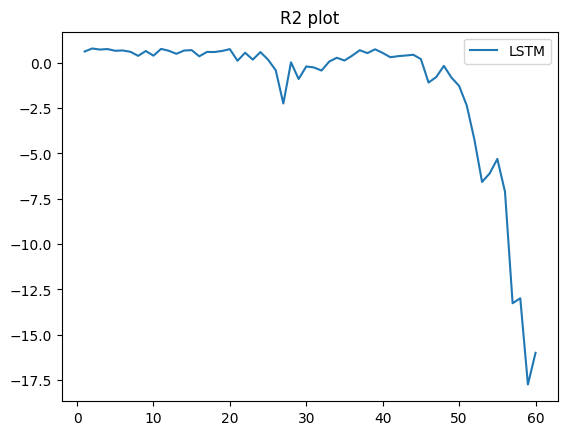

In [104]:
plt.plot(range(1, len(R2_iso)+1), R2_iso, label='LSTM')
plt.title('R2 plot')
plt.legend()
plt.show()

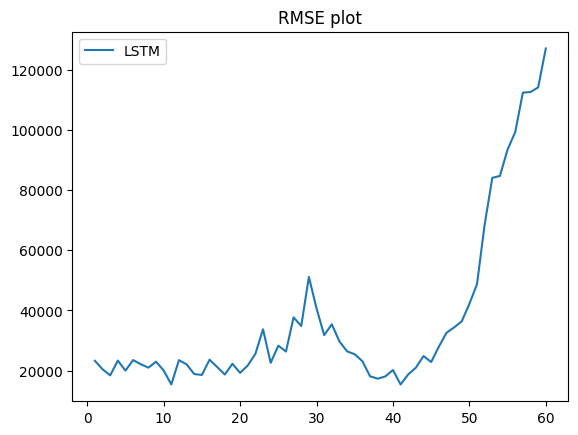

In [105]:
plt.plot(range(1, len(RMSE_iso)+1), RMSE_iso, label='LSTM')
plt.title('RMSE plot')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(np.array(R2_scaled + RMSE_scaled).reshape(2,-1).T, columns = ['R2', 'RMSE']).to_csv('LSTM_scaled_results.csv')